In [10]:
from sklearn.datasets import load_iris

iris = load_iris()
x = iris.data
y = iris.target

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D_train = pca.fit_transform(x_train)

In [13]:
X2D_train

array([[ 2.26610415e+00,  3.74390896e-01],
       [ 1.79462847e+00, -1.78232727e-01],
       [-2.42119577e+00,  4.33844731e-01],
       [-2.73911776e+00,  3.45386526e-01],
       [-2.82815538e+00, -6.94932892e-02],
       [ 9.10320279e-01, -1.56593207e-01],
       [-2.63822969e+00,  6.19471501e-01],
       [ 6.31483382e-01,  4.75702568e-02],
       [ 9.74811497e-01, -9.50108352e-02],
       [ 2.11596533e+00, -1.69951955e-01],
       [-2.68328482e+00, -9.71320417e-02],
       [-1.81474565e-01, -2.23137686e-01],
       [ 2.55435522e+00,  3.20456906e-01],
       [-2.51712478e+00, -1.27632929e-01],
       [ 8.80735857e-01, -4.32945944e-03],
       [ 3.48416833e+00,  4.96277822e-01],
       [ 1.07656681e+00,  1.07561848e-01],
       [-2.64087135e+00, -1.79343748e-01],
       [ 6.33131379e-01, -3.90110270e-01],
       [-2.98762187e+00, -4.69409671e-01],
       [-2.65097977e+00,  3.31250955e-01],
       [-2.81120215e+00,  2.85206038e-01],
       [-2.84771035e+00, -2.09655739e-01],
       [-2.

In [18]:
pca.components_

array([[ 0.35608572, -0.08460424,  0.85615217,  0.36475821],
       [ 0.6584639 ,  0.72914176, -0.177672  , -0.05665902]])

In [20]:
pca.explained_variance_ratio_

array([0.92528538, 0.05281271])

In [21]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X2D_train, y_train)

SVC()

In [23]:
from sklearn.metrics import accuracy_score

y_hat = svm_clf.predict(X2D_train)
accuracy_score(y_train, y_hat)

0.9583333333333334

In [25]:
svm_clf = SVC()
svm_clf.fit(x_train, y_train)
y_hat = svm_clf.predict(x_train)
accuracy_score(y_train, y_hat)

0.975

# Choosing the Right number of Dimensions

In [28]:
import numpy as np

pca = PCA()
pca.fit(x_train)
summ = sum([x for x in pca.explained_variance_ratio_])
print(summ)
cumsum = np.cumsum(pca.explained_variance_ratio_)

1.0


In [31]:
cumsum

array([0.92528538, 0.97809808, 0.99434738, 1.        ])

In [30]:
d = np.argmax(cumsum > 0.95) + 1

In [33]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(x_train)

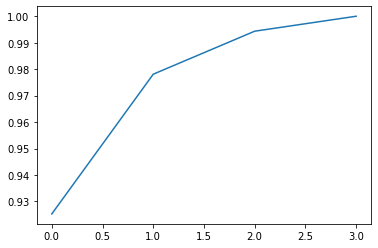

In [34]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.plot(cumsum)